In [7]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

sys.path.append(os.path.abspath(os.path.join('..')))
from utils.data_plotting import *

### Load the CSV data into pandas dataframes

In [8]:
csv_data = {}

data_path = os.path.join('..', '..', 'data', 'dlis_preprocessed', '**', '*.csv')

for file in glob.glob(data_path, recursive=True):
    relative_path = os.path.relpath(file, os.path.join('..', '..', 'data', 'dlis_preprocessed'))
    
    # Divide the relative path in parts
    parts = relative_path.split(os.sep)

    # Name of the well
    folder_name = parts[0]
        
    file_name = parts[1] + "_" + parts[2]
        
    # Create a new dict if it's the first file of the well
    if folder_name not in csv_data:
        csv_data[folder_name] = {}
        
    csv_data[folder_name][file_name] = pd.read_csv(file)

In [9]:
iv_spliced_path = '../../data/dlis_spliced/test_IV.csv'
iv_spliced = pd.read_csv(iv_spliced_path)

### Create dataframes for GR data

In [10]:
gr_data = {}

for well, dict in csv_data.items():
    gr_data[well] = {}

    for key, df in dict.items():
        try:
            gr_df = df[['GR', 'TDEP']]

            gr_data[well][key] = gr_df

            print(well + key)
        except:
            pass

1CSC 0001  SElogical_file_logical_file_0_frame_frame_0.csv.csv
1CSC 0001  SElogical_file_logical_file_10_frame_frame_0.csv.csv
1CSC 0001  SElogical_file_logical_file_11_frame_frame_0.csv.csv
1CSC 0001  SElogical_file_logical_file_12_frame_frame_0.csv.csv
1IDA 0001  SElogical_file_logical_file_5_frame_frame_0.csv.csv
1IV  0002  SElogical_file_logical_file_0_frame_frame_0.csv.csv
1IV  0002  SElogical_file_logical_file_4_frame_frame_0.csv.csv
1IV  0002  SElogical_file_logical_file_7_frame_frame_0.csv.csv
1IV  0002  SElogical_file_logical_file_8_frame_frame_0.csv.csv
1MO  0001  SElogical_file_logical_file_7_frame_frame_0.csv.csv


In [ ]:
df1 = gr_data['1IV  0002  SE']['logical_file_logical_file_4_frame_frame_0.csv.csv']
df2 = gr_data['1IV  0002  SE']['logical_file_logical_file_8_frame_frame_0.csv.csv']
df3 = gr_data['1IV  0002  SE']['logical_file_logical_file_0_frame_frame_0.csv.csv']
df4 = gr_data['1IV  0002  SE']['logical_file_logical_file_7_frame_frame_0.csv.csv']

plot_gr_logs_5_runs(iv_spliced, df1, df2, df3, df4, "Emenda GR - IV")

file_path = f"gr_logs/1IV  0002  SE/emenda_test_5.pdf"

os.makedirs(os.path.dirname(file_path), exist_ok=True)

plt.savefig(file_path, format='pdf')
plt.close

<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

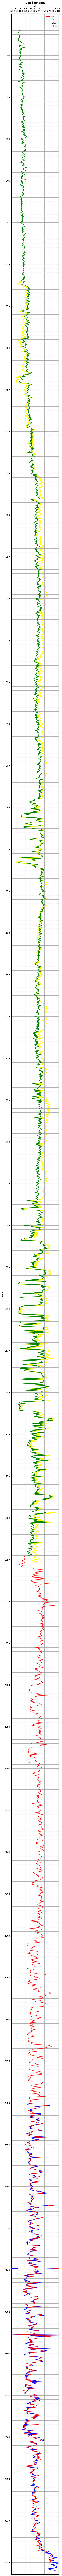

In [12]:
df1 = gr_data['1IV  0002  SE']['logical_file_logical_file_4_frame_frame_0.csv.csv']
df2 = gr_data['1IV  0002  SE']['logical_file_logical_file_8_frame_frame_0.csv.csv']
df3 = gr_data['1IV  0002  SE']['logical_file_logical_file_0_frame_frame_0.csv.csv']
df4 = gr_data['1IV  0002  SE']['logical_file_logical_file_7_frame_frame_0.csv.csv']

plot_gr_logs_4_runs(iv_spliced, df1, df2, df3, df4, "IV pré-emenda")

file_path = f"gr_logs/1IV  0002  SE/pre-emenda.pdf"

os.makedirs(os.path.dirname(file_path), exist_ok=True)

plt.savefig(file_path, format='pdf')
plt.close

In [ ]:
plot_gr_logs(iv_spliced, "Emenda GR - IV")

file_path = f"gr_logs/1IV  0002  SE/emenda_test_4.pdf"

os.makedirs(os.path.dirname(file_path), exist_ok=True)

plt.savefig(file_path, format='pdf')
plt.close

In [ ]:
df1 = gr_data['1IV  0002  SE']['logical_file_4_frame_0.csv']
df2 = gr_data['1IV  0002  SE']['logical_file_8_frame_0.csv']

plot_gr_logs_2_wells(df1, df2, 'IV - file_4 X file_8')

file_path = f"gr_logs/1IV  0002  SE/file_4_X_file_8.pdf"

os.makedirs(os.path.dirname(file_path), exist_ok=True)

plt.savefig(file_path, format='pdf')
plt.close

In [ ]:
gr_dir = 'gr_logs'

for well, dict in gr_data.items():
    well_dir = well

    for key, df in dict.items():
        plot_gr_logs(df, well + " " + key)

        file_path = f"{gr_dir}/{well_dir}/{key}.pdf"

        os.makedirs(os.path.dirname(file_path), exist_ok=True)

        plt.savefig(file_path, format='pdf')
        plt.close